In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
df.isnull().sum()*100/len(df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
#Changing nomenclature to 
df.columns = df.columns.str.replace(' ', '_').str.lower()

# test
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [11]:
df.drop(["prospect_id"], axis=1, inplace=True)

In [12]:
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)
df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,...,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified


### Replace select category with null values

In [13]:
# Select all non-numeric columns
df_obj = df.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


In [14]:
# select all the columns that have a "Select" entry
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# replace values
df[sel_cols] = df[sel_cols].replace('Select', np.NaN)

In [15]:
df.shape

(9240, 36)

In [16]:
df.isnull().sum()*100/len(df)

lead_number                      0.000000
lead_origin                      0.000000
lead_source                      0.389610
do_not_email                     0.000000
do_not_call                      0.000000
converted                        0.000000
total_visits                     1.482684
time_on_website                  0.000000
page_views_per_visit             1.482684
last_activity                    1.114719
country                         26.634199
specialization                  36.580087
source                          78.463203
occupation                      29.112554
course_selection_reason         29.318182
search                           0.000000
magazine                         0.000000
newspaper_article                0.000000
x_education_forums               0.000000
newspaper                        0.000000
digital_advertisement            0.000000
through_recommendations          0.000000
courses_updates                  0.000000
tags                            36

In [17]:
df.drop(['source', 'lead_quality', 'lead_profile', 'tags', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 
         'asymmetrique_activity_score', 'asymmetrique_profile_score', 'last_notable_activity',], axis = 1, inplace = True)

df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,...,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,No,NaN,No,No


In [18]:
df.isnull().sum()*100/len(df)

lead_number                      0.000000
lead_origin                      0.000000
lead_source                      0.389610
do_not_email                     0.000000
do_not_call                      0.000000
converted                        0.000000
total_visits                     1.482684
time_on_website                  0.000000
page_views_per_visit             1.482684
last_activity                    1.114719
country                         26.634199
specialization                  36.580087
occupation                      29.112554
course_selection_reason         29.318182
search                           0.000000
magazine                         0.000000
newspaper_article                0.000000
x_education_forums               0.000000
newspaper                        0.000000
digital_advertisement            0.000000
through_recommendations          0.000000
courses_updates                  0.000000
supply_chain_content_updates     0.000000
dm_content_updates               0

In [19]:
df.country.value_counts(dropna = False, normalize = True) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [20]:
df.drop(['country'], axis = 1, inplace = True)

In [21]:
df.course_selection_reason.value_counts(dropna = False, normalize = True) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: course_selection_reason, dtype: float64

In [22]:
df.drop(['course_selection_reason'], axis = 1, inplace = True)

In [23]:
df.occupation.value_counts(dropna = False, normalize = True) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: occupation, dtype: float64

In [24]:
# combine low representing categories
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [25]:
df.occupation.value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: occupation, dtype: float64

In [26]:
# impute proportionately
df['occupation'] = df.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

In [27]:
df.specialization.value_counts(dropna = False, normalize = True) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: specialization, dtype: float64

In [28]:
# combine all Management categories
df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') 
       | (df.specialization == 'Marketing Management') | (df.specialization == 'Operations Management') 
       | (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management')
       | (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management')
       | (df.specialization == 'Retail Management')
       , 'specialization'] = 'Management Specialization'

# combine all Business categories
df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business')
       | (df.specialization == 'E-Business') | (df.specialization == 'Rural and Agribusiness'), 'specialization'] = 'Business Specialization'

# combine all industry categories
df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Travel and Tourism')
       | (df.specialization == 'Media and Advertising') | (df.specialization == 'E-COMMERCE')
       | (df.specialization == 'Services Excellence'), 'specialization'] = 'Industry Specialization'


In [29]:
df.specialization.value_counts(normalize = True) 

Management Specialization    0.725768
Industry Specialization      0.152901
Business Specialization      0.121331
Name: specialization, dtype: float64

In [30]:
# impute proportionately
df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management Specialization', 'Industry Specialization', 
                                                                    'Business Specialization'], 
                                                                   p = [0.725768, 0.152901, 0.121331], size = len(df))))

In [31]:
df.city.value_counts(dropna = False, normalize = True) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: city, dtype: float64

In [32]:
# combine Non mumbai maharshtra cities
df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'),
       'city'] = 'Non mumbai maharshtra cities' 

# Combine other cities
df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities'), 
      'city'] = 'other cities'

In [33]:
df.city.value_counts(normalize = True)

Mumbai                          0.578352
Non mumbai maharshtra cities    0.217017
other cities                    0.204631
Name: city, dtype: float64

In [34]:
# impute proportionately
df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non mumbai maharshtra cities', 
                                                                    'other cities'], 
                                                                   p = [0.578352, 0.217017, 0.204631], size = len(df))))

In [35]:
df.isnull().sum()*100/len(df)

lead_number                     0.000000
lead_origin                     0.000000
lead_source                     0.389610
do_not_email                    0.000000
do_not_call                     0.000000
converted                       0.000000
total_visits                    1.482684
time_on_website                 0.000000
page_views_per_visit            1.482684
last_activity                   1.114719
specialization                  0.000000
occupation                      0.000000
search                          0.000000
magazine                        0.000000
newspaper_article               0.000000
x_education_forums              0.000000
newspaper                       0.000000
digital_advertisement           0.000000
through_recommendations         0.000000
courses_updates                 0.000000
supply_chain_content_updates    0.000000
dm_content_updates              0.000000
city                            0.000000
cheque_payment                  0.000000
mastering_interv

In [36]:
df.total_visits.value_counts(normalize = True, dropna= False)*100

0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
24.0      0.054113
25.0      0.054113
27.0      0.054113
22.0      0.032468
29.0      0.021645
28.0      0.021645
26.0      0.021645
141.0     0.010823
55.0      0.010823
30.0      0.010823
43.0      0.010823
74.0      0.010823
41.0      0.010823
54.0      0.010823
115.0     0.010823
251.0     0.010823
32.0      0.010823
42.0      0.010823
Name: total_visits, dtype: float64

In [37]:
med = df["total_visits"].median()
df["total_visits"] = df["total_visits"].fillna(med)

In [38]:
df.page_views_per_visit.value_counts(normalize = True, dropna= False)*100

0.00    23.690476
2.00    19.426407
3.00    12.943723
4.00     9.696970
1.00     7.045455
          ...    
2.56     0.010823
6.33     0.010823
1.64     0.010823
8.21     0.010823
2.08     0.010823
Name: page_views_per_visit, Length: 115, dtype: float64

In [39]:
med = df["page_views_per_visit"].median()
df["page_views_per_visit"] = df["page_views_per_visit"].fillna(med)

In [40]:
df.lead_source.value_counts(normalize = True, dropna= False)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: lead_source, dtype: float64

In [41]:
df["lead_source"].mode([0])
df["lead_source"] = df["lead_source"].fillna(df["lead_source"].mode()[0])

In [42]:
df.lead_source.value_counts(normalize = True, dropna= False)*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: lead_source, dtype: float64

In [43]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference') |(x=='Welingak Website') | (x=='Referral Sites')) 
                                            else 'Other Social Sites')

In [44]:
df.lead_source.value_counts(normalize = True, dropna= False)*100

Google                31.428571
Direct Traffic        27.521645
Olark Chat            18.993506
Organic Search        12.489177
Reference              5.779221
Welingak Website       1.536797
Referral Sites         1.352814
Other Social Sites     0.898268
Name: lead_source, dtype: float64

In [45]:
df.last_activity.value_counts(dropna = False, normalize =True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: last_activity, dtype: float64

In [46]:
df['last_activity'] = df['last_activity'].replace(['Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [47]:
df["last_activity"].mode([0])
df["last_activity"] = df["last_activity"].fillna(df["last_activity"].mode()[0])

In [48]:
df.last_activity.value_counts(dropna = False, normalize =True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Other_Activity                1.212121
Unreachable                   1.006494
Name: last_activity, dtype: float64

In [49]:
df.isnull().sum()*100/len(df)

lead_number                     0.0
lead_origin                     0.0
lead_source                     0.0
do_not_email                    0.0
do_not_call                     0.0
converted                       0.0
total_visits                    0.0
time_on_website                 0.0
page_views_per_visit            0.0
last_activity                   0.0
specialization                  0.0
occupation                      0.0
search                          0.0
magazine                        0.0
newspaper_article               0.0
x_education_forums              0.0
newspaper                       0.0
digital_advertisement           0.0
through_recommendations         0.0
courses_updates                 0.0
supply_chain_content_updates    0.0
dm_content_updates              0.0
city                            0.0
cheque_payment                  0.0
mastering_interview             0.0
dtype: float64

In [50]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 8
do_not_email = 2
do_not_call = 2
last_activity = 10
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


**Observation**
* The following columns can be dropped as they have just 1 unique values
    * `magazine`
    * `course_updates`
    * `supply_chain_content_updates`
    * `dm_content_updates`
    * `cheque_payment`
    
 Let's now check the data imbalance for the rest of the columns

In [51]:
df.drop(['magazine', 'courses_updates', 'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment'], axis = 1, inplace = True)

In [52]:
# select rest of the binary columns in a new dataframe
df_bin = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No     92.056277
Yes     7.943723
Name: do_not_email, dtype: float64

No     99.978355
Yes     0.021645
Name: do_not_call, dtype: float64

No     99.848485
Yes     0.151515
Name: search, dtype: float64

No     99.978355
Yes     0.021645
Name: newspaper_article, dtype: float64

No     99.989177
Yes     0.010823
Name: x_education_forums, dtype: float64

No     99.989177
Yes     0.010823
Name: newspaper, dtype: float64

No     99.95671
Yes     0.04329
Name: digital_advertisement, dtype: float64

No     99.924242
Yes     0.075758
Name: through_recommendations, dtype: float64

No     68.744589
Yes    31.255411
Name: mastering_interview, dtype: float64



Because of heavy imbalance data we can drop these columns as well:
'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations'

In [53]:
df.drop(['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations'], axis = 1, inplace = True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   int64  
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   float64
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   last_activity         9240 non-null   object 
 9   specialization        9240 non-null   object 
 10  occupation            9240 non-null   object 
 11  city                  9240 non-null   object 
 12  mastering_interview   9240 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 938.6+ KB


#### `lead_number` column: change datatype

`lead_number` column is a unique identifier for each leads. Therefore, aggregations won't be of any relevance. We should change it to object

In [55]:
df.lead_number = df.lead_number.astype('object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   float64
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   last_activity         9240 non-null   object 
 9   specialization        9240 non-null   object 
 10  occupation            9240 non-null   object 
 11  city                  9240 non-null   object 
 12  mastering_interview   9240 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 938.6+ KB


In [57]:
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Business Specialization,Unemployed,other cities,No
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Management Specialization,Unemployed,Non mumbai maharshtra cities,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Specialization,Student and Others,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Industry Specialization,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Management Specialization,Unemployed,Mumbai,No


## Exploratory data analysis

### Numerical columns

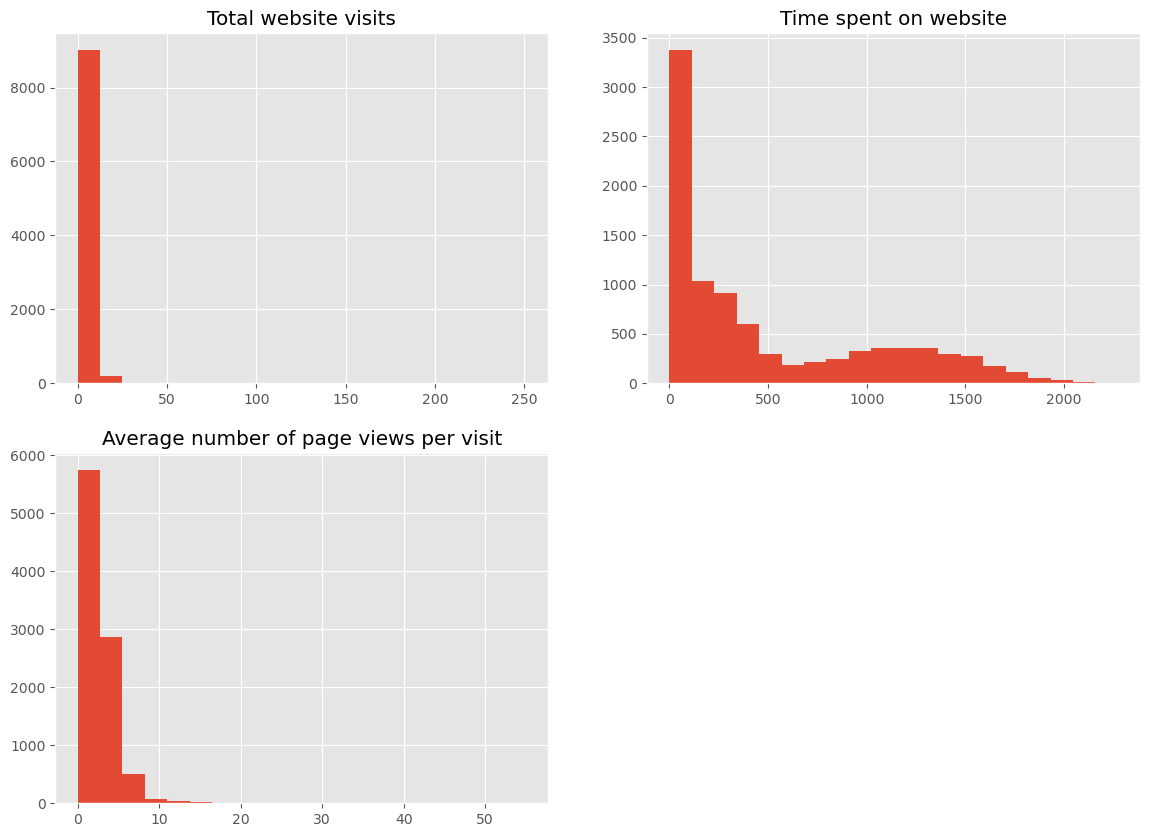

In [58]:
#total_visits, time_on_website, page_views_per_visit
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

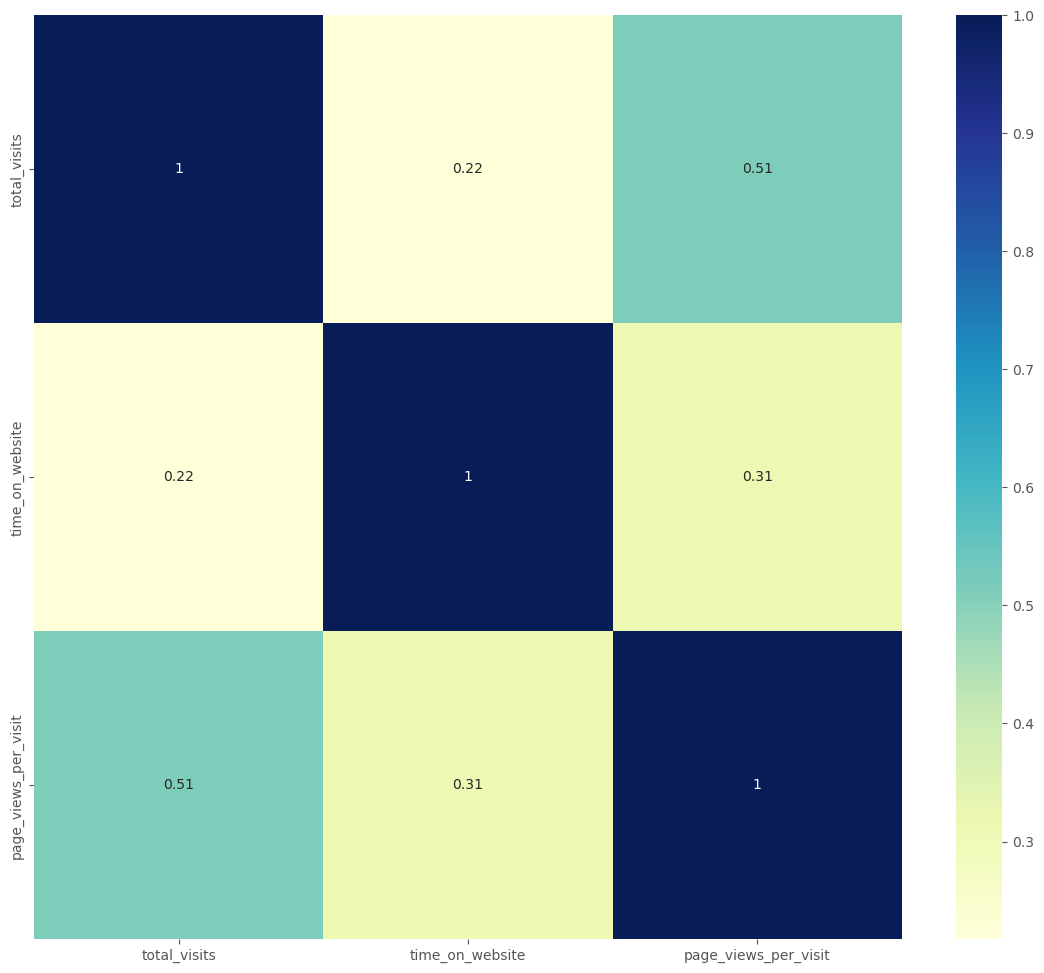

In [59]:
plt.figure(figsize = (14,12))
sns.heatmap(df[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

### Check for outliers

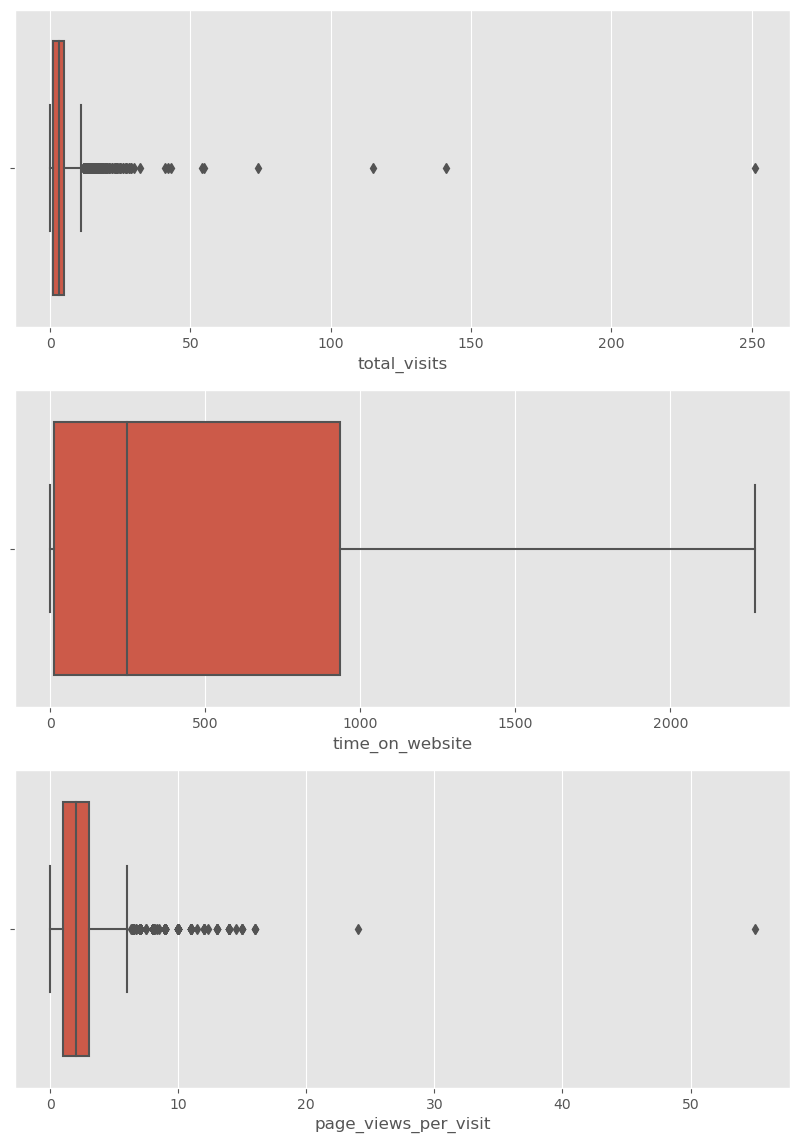

In [60]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df.page_views_per_visit)
plt.show()

## Categorical columns

In [61]:
#lead_origin, lead_source, do_not_email, specialization, occupation, city, mastering_interview

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

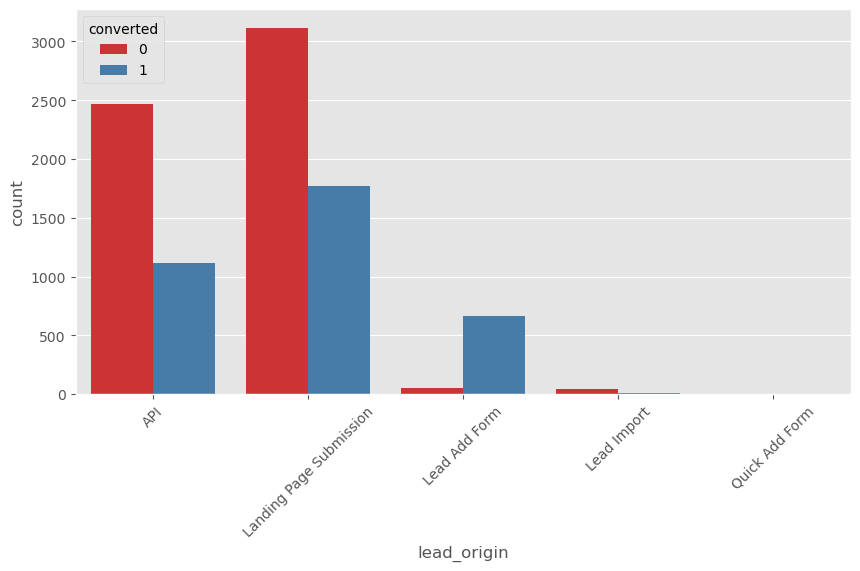

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x = "lead_origin", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

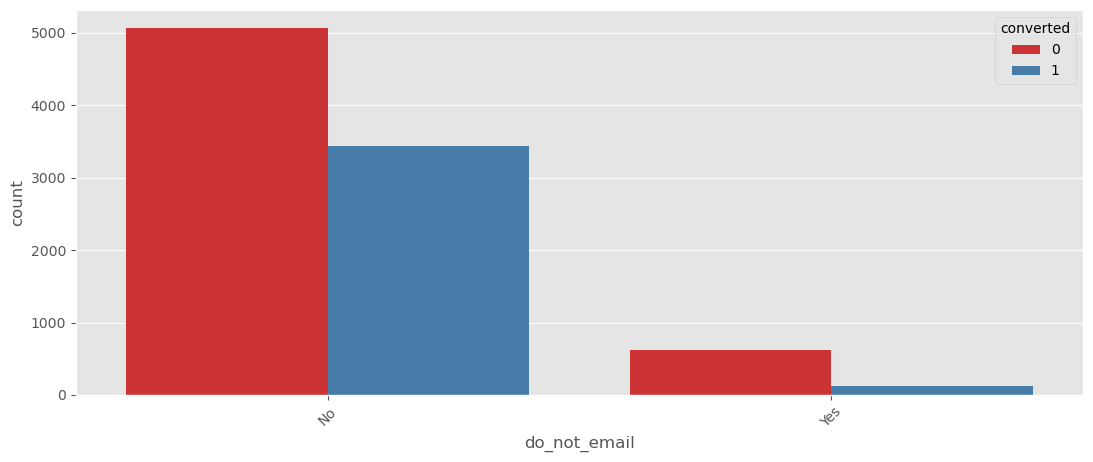

In [63]:
plt.figure(figsize=(13,5))
sns.countplot(x = "do_not_email", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)


(array([0, 1, 2]),
 [Text(0, 0, 'Business Specialization'),
  Text(1, 0, 'Management Specialization'),
  Text(2, 0, 'Industry Specialization')])

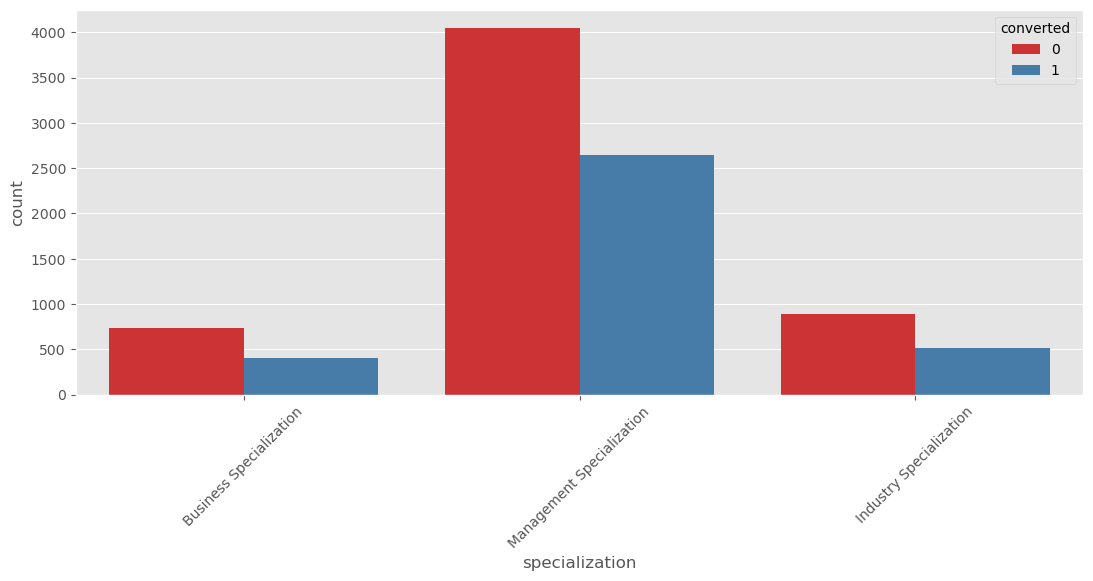

In [64]:
plt.figure(figsize=(13,5))
sns.countplot(x = "specialization", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)


(array([0, 1, 2]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student and Others'),
  Text(2, 0, 'Working Professional')])

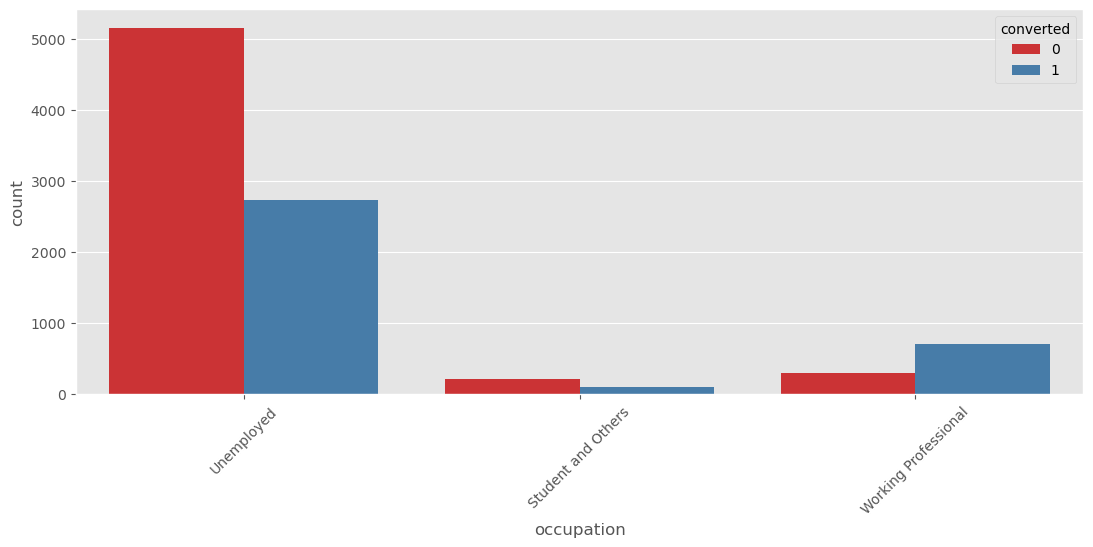

In [65]:
plt.figure(figsize=(13,5))
sns.countplot(x = "occupation", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)


(array([0, 1, 2]),
 [Text(0, 0, 'other cities'),
  Text(1, 0, 'Non mumbai maharshtra cities'),
  Text(2, 0, 'Mumbai')])

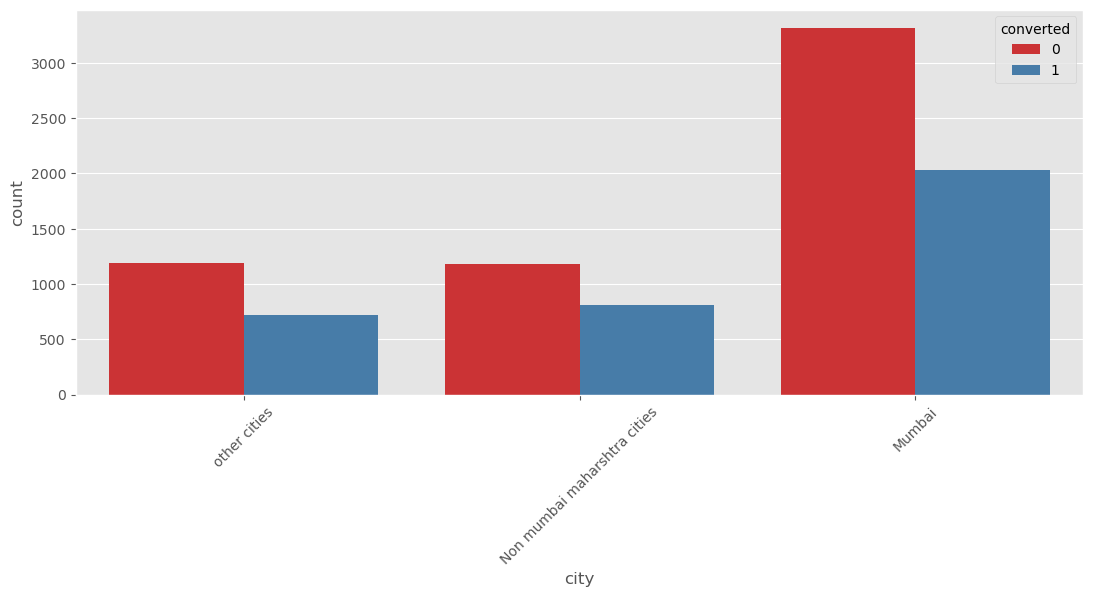

In [66]:
plt.figure(figsize=(13,5))
sns.countplot(x = "city", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

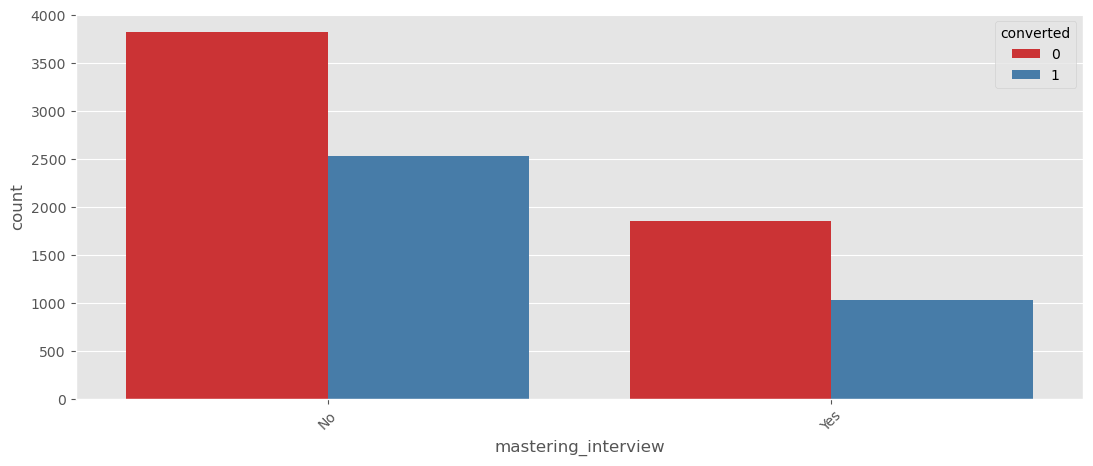

In [67]:
plt.figure(figsize=(13,5))
sns.countplot(x = "mastering_interview", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Other_Activity'),
  Text(9, 0, 'SMS Sent')])

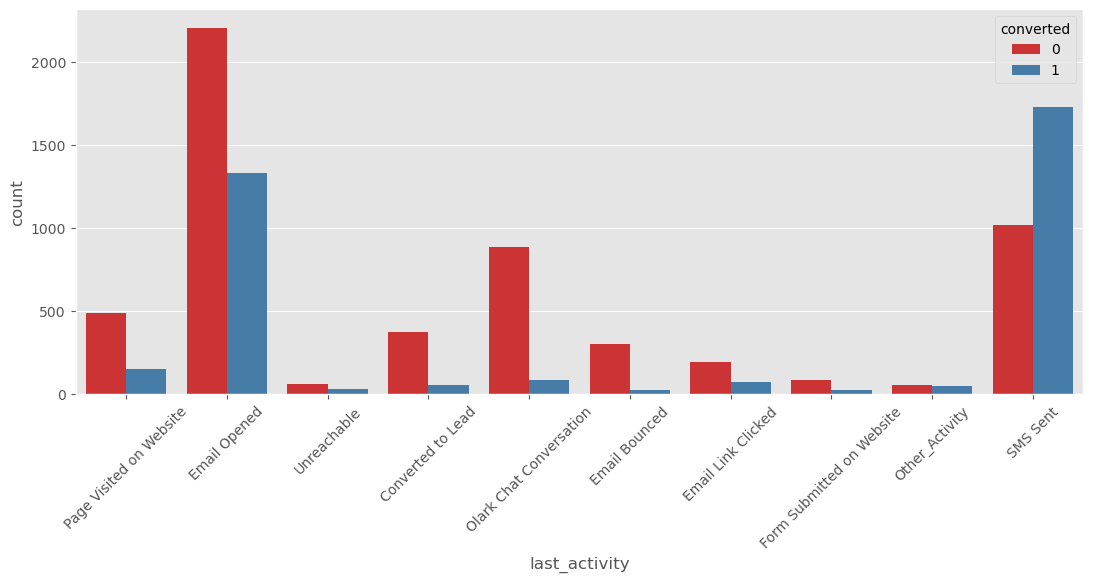

In [68]:
plt.figure(figsize=(13,5))
sns.countplot(x = "last_activity", hue = "converted", data = df,palette='Set1')
plt.xticks(rotation = 45)


## Data Preparation

In [69]:
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Business Specialization,Unemployed,other cities,No
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Management Specialization,Unemployed,Non mumbai maharshtra cities,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Specialization,Student and Others,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Industry Specialization,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Management Specialization,Unemployed,Mumbai,No


In [70]:
### Converting Binary (Yes/No) to 0/1

In [71]:
# List of variables to map

varlist = ['do_not_email', 'mastering_interview' ]

def binary_map(x):
    return x.map({'Yes' : 1, "No" : 0})

df[varlist] = df[varlist].apply(binary_map)

### Creating dummy variable for categorical values

In [72]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city', 'last_activity']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [73]:
# Delete repeated columns:
df = df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city', 'last_activity'], 1)

In [74]:
df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,...,city_other cities,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Other_Activity,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Outliers treatment

In [75]:
num_cols = df[['total_visits', 'time_on_website', 'page_views_per_visit']]

num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,total_visits,time_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [76]:
# capping at 99 percentile
df.total_visits.loc[df.total_visits >= df.total_visits.quantile(0.9)] = df.total_visits.quantile(0.9)
df.page_views_per_visit.loc[df.page_views_per_visit >= 
                            df.page_views_per_visit.quantile(0.9)] = df.page_views_per_visit.quantile(0.9)

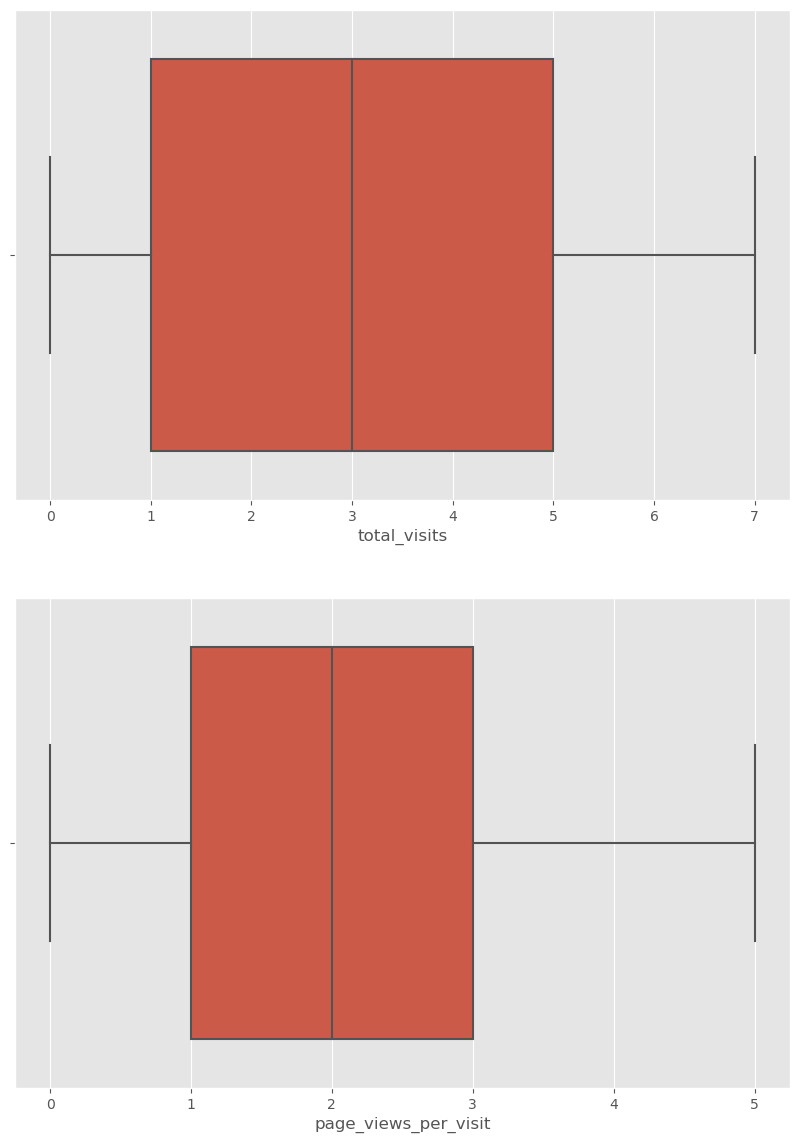

In [77]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)
plt.show()

## Train test split

In [78]:
# Putting feature variable to X
X = df.drop(['lead_number', 'converted'], axis=1)

X.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Google,...,city_other cities,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Other_Activity,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable
0,0,0.0,0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [79]:
y = df['converted']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Google,...,city_other cities,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Form Submitted on Website,last_activity_Olark Chat Conversation,last_activity_Other_Activity,last_activity_Page Visited on Website,last_activity_SMS Sent,last_activity_Unreachable
1871,0,-1.276203,-0.885371,-1.325438,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6795,0,0.448601,0.005716,-0.516136,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3516,0,0.879802,-0.691418,0.195807,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8105,0,0.879802,1.365219,1.717052,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3934,0,-1.276203,-0.885371,-1.325438,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
# checking the conversion rate
conversion = (sum(df['converted'])/len(df['converted'].index))*100
conversion

38.53896103896104

### Checking Correlations

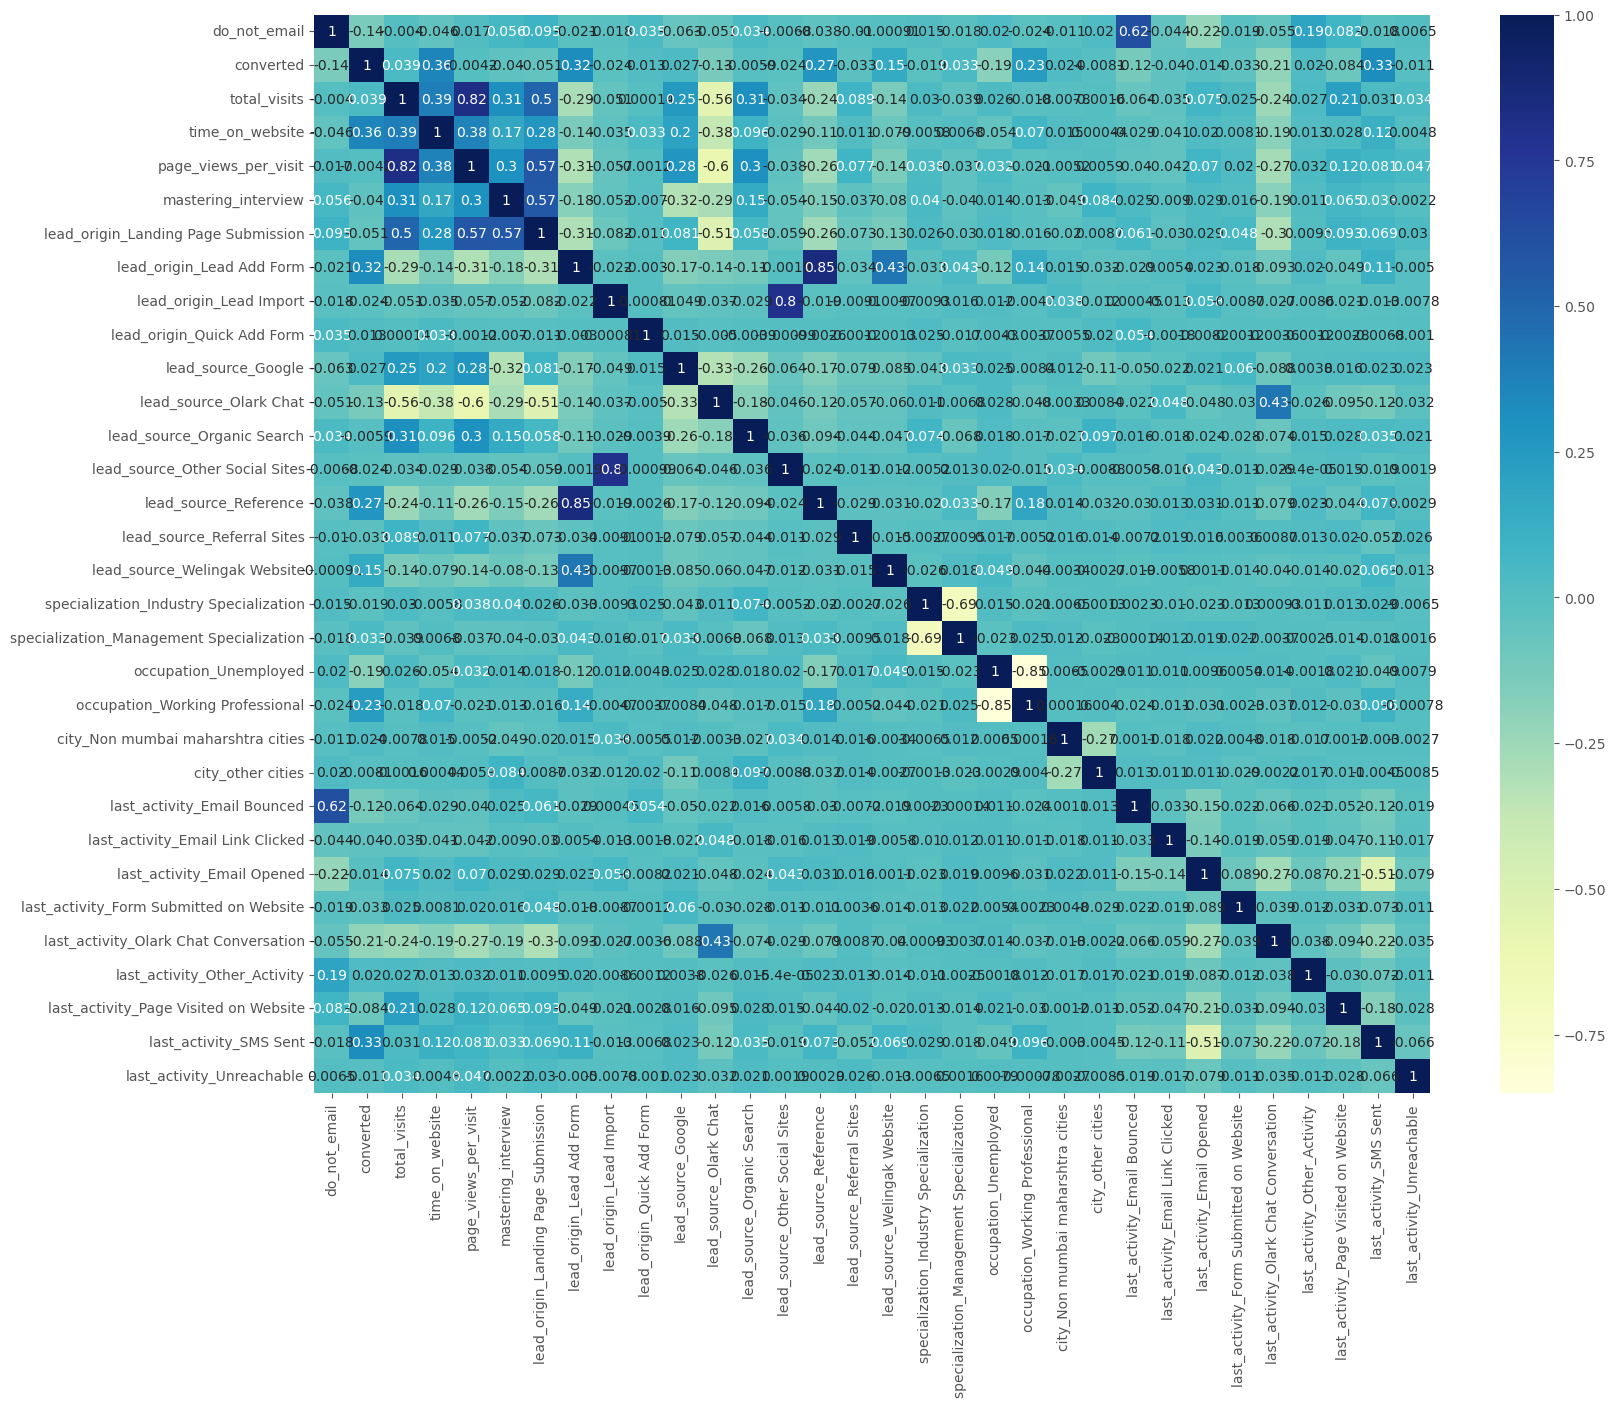

In [85]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,14))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [86]:
df.columns

Index(['lead_number', 'do_not_email', 'converted', 'total_visits',
       'time_on_website', 'page_views_per_visit', 'mastering_interview',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_Lead Import', 'lead_origin_Quick Add Form',
       'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Other Social Sites',
       'lead_source_Reference', 'lead_source_Referral Sites',
       'lead_source_Welingak Website',
       'specialization_Industry Specialization',
       'specialization_Management Specialization', 'occupation_Unemployed',
       'occupation_Working Professional', 'city_Non mumbai maharshtra cities',
       'city_other cities', 'last_activity_Email Bounced',
       'last_activity_Email Link Clicked', 'last_activity_Email Opened',
       'last_activity_Form Submitted on Website',
       'last_activity_Olark Chat Conversation', 'last_activity_Other_Activity',
       'last_activity_Page V

In [87]:
X_test.drop(['lead_origin_Lead Add Form', 'specialization_Industry Specialization', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form', 'specialization_Industry Specialization', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

In [88]:
## lets check correlation matrix again

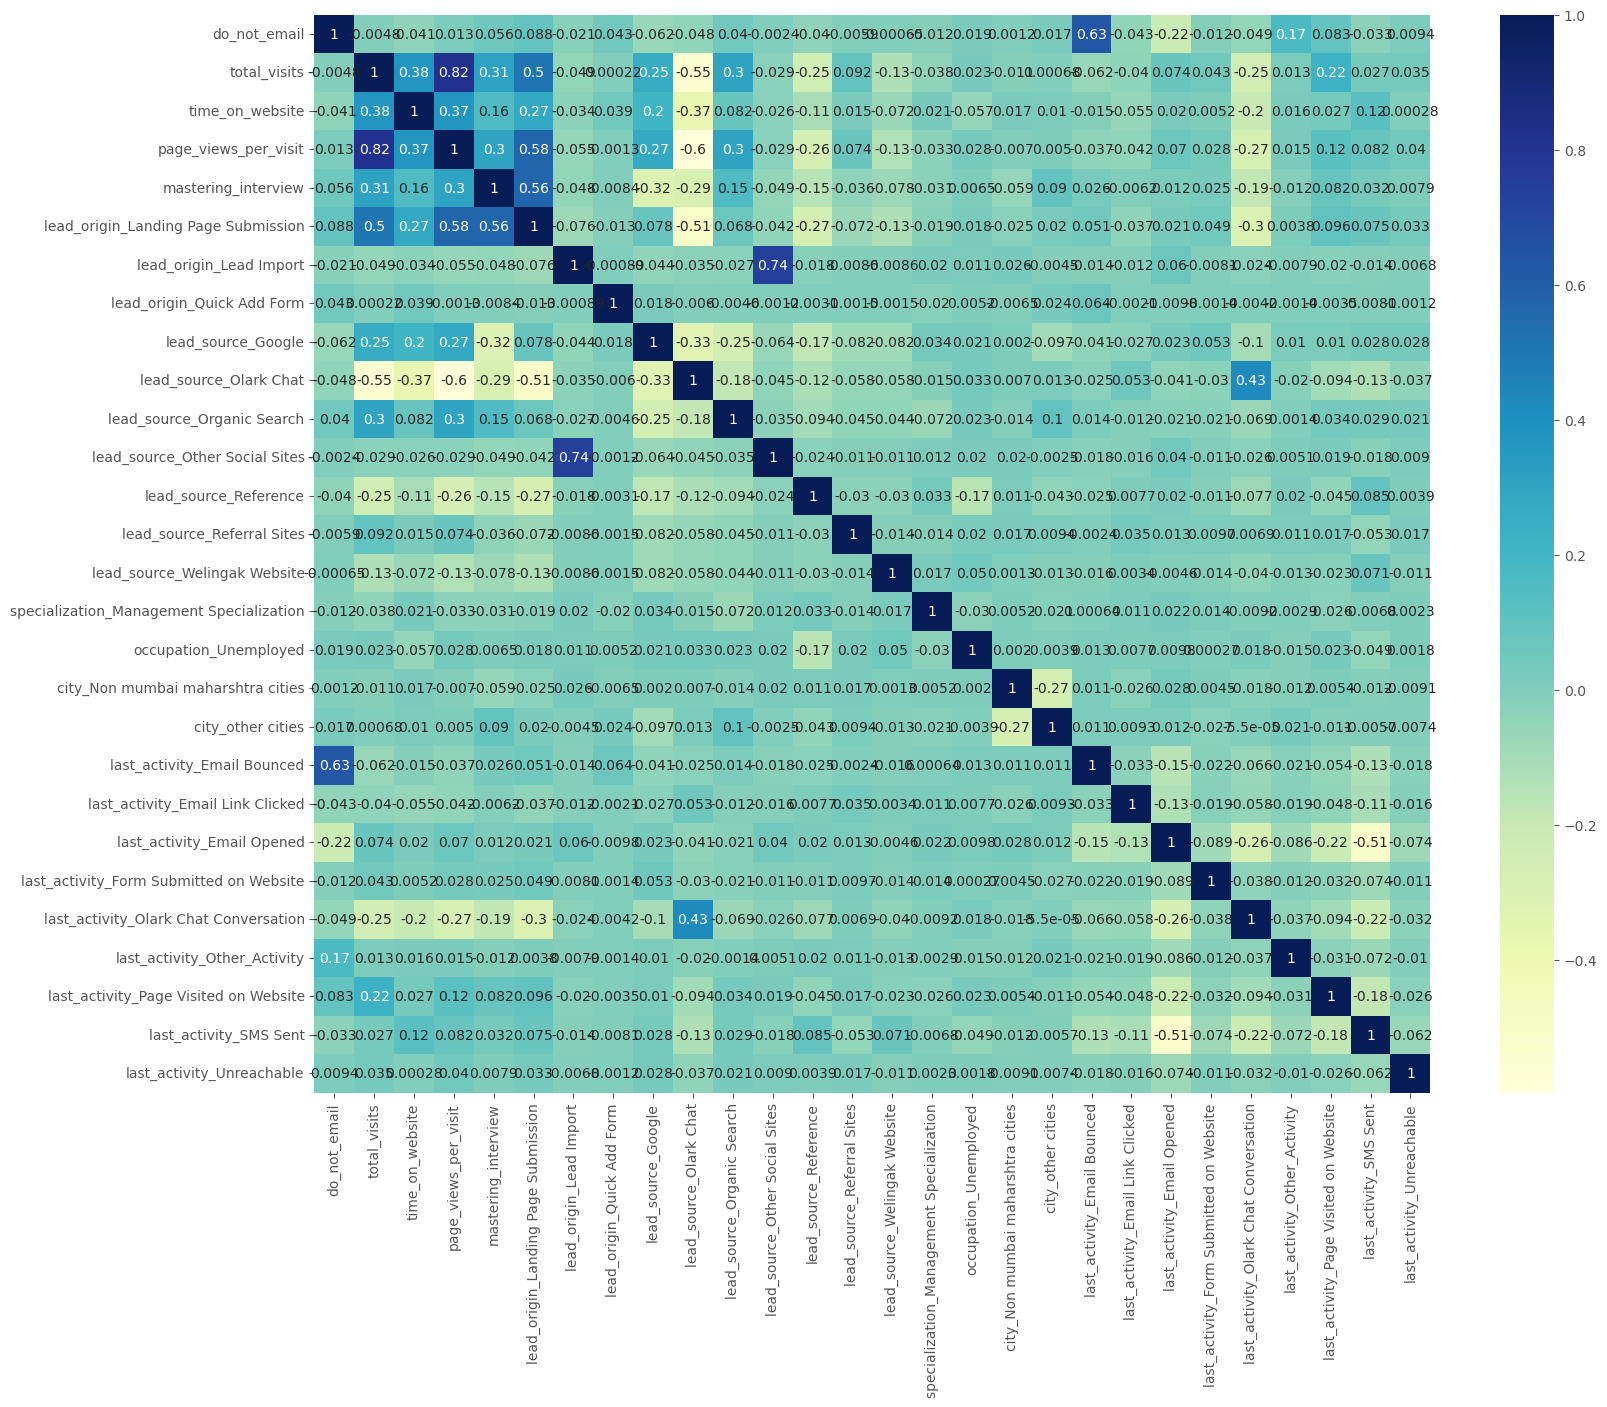

In [89]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,14))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

## Model Building

In [90]:
import statsmodels.api as sm

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [93]:
model=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2835.8
Date:                Tue, 17 Oct 2023   Deviance:                       5671.5
Time:                        23:21:50   Pearson chi2:                 6.81e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3640
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4937      0.253     -5.902      0.000      -1.990      -0.998
do_not_email                                -1.2455      0.196     -6.365      0.000      -1.629      -0.862
total_visits                                 0.3695      0.060      6.196      0.000       0.253       0.486
time_on_website                              1.0702      0.038     27.895      0.000       0.995       1.145
page_views_per_visit                        -0.3762      0.064     -5.913      0.000      -0.501      -0.252
mastering_interview                         -0.0253      0.101     -0.250      0.802      -0.223       0.173
lead_origin_Landing Page Submission         -0.1387      0.103     -1.351      0.177      -0.340       0.063
lead_origin_Lead Import                     -1.1826      0.703     -1.682      0.093      -2.561       0.196
lead_origin_Quick Add Form                  20.1650   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
lead_source_Google                           0.3340      0.108      3.079      0.002       0.121       0.547
lead_source_Olark Chat                       1.0643      0.158      6.756      0.000       0.756       1.373
lead_source_Organic Search                   0.1281      0.125      1.023      0.306      -0.117       0.373
lead_source_Other Social Sites               0.8274      0.492      1.683      0.092      -0.136       1.791
lead_source_Reference                        3.7036      0.234     15.816      0.000       3.245       4.163
lead_source_Referral Sites                   0.0604      0.308      0.196      0.845      -0.544       0.664
lead_source_Welingak Website                 5.5463      0.740      7.491      0.000       4.095       6.997
specialization_Management Specialization     0.0828      0.075      1.106      0.269      -0.064       0.230
occupation_Unemployed                       -1.1200      0.093    -12.006      0.000      -1.303      -0.937
city_Non mumbai maharshtra cities            0.0827      0.084      0.987      0.324      -0.082       0.247
city_other cities                            0.0786      0.085      0.921      0.357      -0.089       0.246
last_activity_Email Bounced                  0.4066      0.391      1.040      0.298      -0.359       1.172
last_activity_Email Link Clicked             0.6368      0.291      2.187      0.029       0.066       1.208
last_activity_Email Opened                   1.1936      0.212      5.627      0.000       0.778       1.609
last_activity_Form Submitted on Website      0.5369      0.375      1.432      0.152      -0.198       1.272
last_activity_Olark Chat Conversation       -0.4551      0.260     -1.749      0.080      -0.965       0.055
last_activity_Other_Activity   

In [94]:
# initiate logistic regression
logreg = LogisticRegression()

# initiate rfe
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('mastering_interview', False, 8),
 ('lead_origin_Landing Page Submission', False, 2),
 ('lead_origin_Lead Import', True, 1),
 ('lead_origin_Quick Add Form', True, 1),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 4),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('lead_source_Referral Sites', False, 9),
 ('lead_source_Welingak Website', True, 1),
 ('specialization_Management Specialization', False, 5),
 ('occupation_Unemployed', True, 1),
 ('city_Non mumbai maharshtra cities', False, 6),
 ('city_other cities', False, 7),
 ('last_activity_Email Bounced', False, 3),
 ('last_activity_Email Link Clicked', True, 1),
 ('last_activity_Email Opened', True, 1),
 ('last_activity_Form Submitted on Website', True, 1),
 ('last_activity_Olark Chat Conversation', True, 1),
 ('

In [96]:
# assign columns
col = X_train.columns[rfe.support_]

In [97]:
# check what columns were not selected by RFE
X_train.columns[~rfe.support_]

Index(['mastering_interview', 'lead_origin_Landing Page Submission',
       'lead_source_Organic Search', 'lead_source_Referral Sites',
       'specialization_Management Specialization',
       'city_Non mumbai maharshtra cities', 'city_other cities',
       'last_activity_Email Bounced'],
      dtype='object')

In [98]:
#Model2

In [99]:
X_train_sm = sm.add_constant(X_train[col])
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.3
Date:                Tue, 17 Oct 2023   Deviance:                       5680.6
Time:                        23:21:51   Pearson chi2:                 6.81e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3631
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.3764      0.189     -7.271      0.000      -1.747      -1.005
do_not_email                               -1.1640      0.174     -6.689      0.000      -1.505      -0.823
total_visits                                0.3771      0.059      6.444      0.000       0.262       0.492
time_on_website                             1.0720      0.038     27.996      0.000       0.997       1.147
page_views_per_visit                       -0.3900      0.062     -6.323      0.000      -0.511      -0.269
lead_origin_Lead Import                    -1.0594      0.702     -1.510      0.131      -2.435       0.316
lead_origin_Quick Add Form                 20.4410   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
lead_source_Google                          0.3341      0.076      4.393      0.000       0.185       0.483
lead_source_Olark Chat                      1.1442      0.136      8.436      0.000       0.878       1.410
lead_source_Other Social Sites              0.8063      0.487      1.656      0.098      -0.148       1.761
lead_source_Reference                       3.7913      0.219     17.329      0.000       3.363       4.220
lead_source_Welingak Website                5.6441      0.738      7.647      0.000       4.198       7.091
occupation_Unemployed                      -1.1170      0.093    -11.996      0.000      -1.300      -0.934
last_activity_Email Link Clicked            0.5249      0.270      1.942      0.052      -0.005       1.055
last_activity_Email Opened                  1.0834      0.182      5.944      0.000       0.726       1.441
last_activity_Form Submitted on Website     0.3981      0.357      1.116      0.264      -0.301       1.097
last_activity_Olark Chat Conversation      -0.5440      0.235     -2.314      0.021      -1.005      -0.083
last_activity_Other_Activity                2.3034      0.338      6.821      0.000       1.642       2.965
last_activity_Page Visited on Website       0.3993      0.221      1.804      0.071      -0.034       0.833
last_activity_SMS Sent                      2.2749      0.182     12.526      0.000       1.919       2.631
last_activity_Unreachable                   1.1408      0.384      2.968      0.003       0.387       1.894
===========================================================================================================
"""

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.75
14,last_activity_Email Opened,4.61
19,last_activity_SMS Sent,4.03
4,page_views_per_visit,3.73
2,total_visits,3.45
16,last_activity_Olark Chat Conversation,2.65
8,lead_source_Olark Chat,2.61
5,lead_origin_Lead Import,2.26
9,lead_source_Other Social Sites,2.25
18,last_activity_Page Visited on Website,2.03


In [101]:
#model 3

In [102]:
col1 = col.drop('lead_origin_Quick Add Form')

In [103]:
X_train_sm = sm.add_constant(X_train[col1])
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.9
Date:                Tue, 17 Oct 2023   Deviance:                       5681.8
Time:                        23:21:51   Pearson chi2:                 6.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3629
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.3690      0.189     -7.255      0.000      -1.739      -0.999
do_not_email                               -1.1536      0.173     -6.658      0.000      -1.493      -0.814
total_visits                                0.3776      0.059      6.451      0.000       0.263       0.492
time_on_website                             1.0737      0.038     28.061      0.000       0.999       1.149
page_views_per_visit                       -0.3904      0.062     -6.330      0.000      -0.511      -0.270
lead_origin_Lead Import                    -1.0578      0.702     -1.507      0.132      -2.433       0.318
lead_source_Google                          0.3359      0.076      4.418      0.000       0.187       0.485
lead_source_Olark Chat                      1.1467      0.136      8.455      0.000       0.881       1.413
lead_source_Other Social Sites              0.8066      0.487      1.657      0.098      -0.148       1.761
lead_source_Reference                       3.7933      0.219     17.338      0.000       3.365       4.222
lead_source_Welingak Website                5.6439      0.738      7.650      0.000       4.198       7.090
occupation_Unemployed                      -1.1163      0.093    -11.989      0.000      -1.299      -0.934
last_activity_Email Link Clicked            0.5155      0.270      1.911      0.056      -0.013       1.044
last_activity_Email Opened                  1.0738      0.182      5.916      0.000       0.718       1.430
last_activity_Form Submitted on Website     0.3878      0.356      1.088      0.277      -0.311       1.086
last_activity_Olark Chat Conversation      -0.5538      0.234     -2.362      0.018      -1.013      -0.094
last_activity_Other_Activity                2.2886      0.337      6.793      0.000       1.628       2.949
last_activity_Page Visited on Website       0.3884      0.221      1.761      0.078      -0.044       0.821
last_activity_SMS Sent                      2.2651      0.181     12.526      0.000       1.911       2.620
last_activity_Unreachable                   1.1307      0.384      2.944      0.003       0.378       1.883
===========================================================================================================
"""

In [104]:
# model 4

In [105]:
col1 = col1.drop('lead_origin_Lead Import')
#X_train_sm = sm.add_constant(X_train[col1])

In [106]:
X_train_sm = sm.add_constant(X_train[col1])
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2842.1
Date:                Tue, 17 Oct 2023   Deviance:                       5684.2
Time:                        23:21:52   Pearson chi2:                 6.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3627
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.3705      0.189     -7.260      0.000      -1.740      -1.001
do_not_email                               -1.1477      0.173     -6.624      0.000      -1.487      -0.808
total_visits                                0.3781      0.059      6.462      0.000       0.263       0.493
time_on_website                             1.0745      0.038     28.076      0.000       0.999       1.150
page_views_per_visit                       -0.3859      0.062     -6.263      0.000      -0.507      -0.265
lead_source_Google                          0.3361      0.076      4.421      0.000       0.187       0.485
lead_source_Olark Chat                      1.1566      0.136      8.534      0.000       0.891       1.422
lead_source_Other Social Sites              0.2608      0.353      0.739      0.460      -0.431       0.953
lead_source_Reference                       3.8031      0.219     17.387      0.000       3.374       4.232
lead_source_Welingak Website                5.6528      0.738      7.663      0.000       4.207       7.099
occupation_Unemployed                      -1.1150      0.093    -11.985      0.000      -1.297      -0.933
last_activity_Email Link Clicked            0.5133      0.270      1.902      0.057      -0.016       1.042
last_activity_Email Opened                  1.0691      0.182      5.888      0.000       0.713       1.425
last_activity_Form Submitted on Website     0.3851      0.356      1.080      0.280      -0.314       1.084
last_activity_Olark Chat Conversation      -0.5545      0.235     -2.364      0.018      -1.014      -0.095
last_activity_Other_Activity                2.2935      0.337      6.803      0.000       1.633       2.954
last_activity_Page Visited on Website       0.3935      0.221      1.784      0.074      -0.039       0.826
last_activity_SMS Sent                      2.2618      0.181     12.504      0.000       1.907       2.616
last_activity_Unreachable                   1.1417      0.383      2.983      0.003       0.391       1.892
===========================================================================================================
"""

In [107]:
# model 5

In [108]:
col1 = col1.drop('lead_source_Other Social Sites')
#X_train_sm = sm.add_constant(X_train[col1])
#lead_source_Other Social Sites

In [109]:
X_train_sm = sm.add_constant(X_train[col1])
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2842.3
Date:                Tue, 17 Oct 2023   Deviance:                       5684.7
Time:                        23:21:52   Pearson chi2:                 6.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3627
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.3691      0.189     -7.256      0.000      -1.739      -0.999
do_not_email                               -1.1464      0.173     -6.618      0.000      -1.486      -0.807
total_visits                                0.3762      0.058      6.438      0.000       0.262       0.491
time_on_website                             1.0733      0.038     28.080      0.000       0.998       1.148
page_views_per_visit                       -0.3884      0.062     -6.311      0.000      -0.509      -0.268
lead_source_Google                          0.3303      0.076      4.370      0.000       0.182       0.478
lead_source_Olark Chat                      1.1424      0.134      8.517      0.000       0.880       1.405
lead_source_Reference                       3.7891      0.218     17.392      0.000       3.362       4.216
lead_source_Welingak Website                5.6386      0.737      7.646      0.000       4.193       7.084
occupation_Unemployed                      -1.1138      0.093    -11.974      0.000      -1.296      -0.931
last_activity_Email Link Clicked            0.5171      0.270      1.917      0.055      -0.012       1.046
last_activity_Email Opened                  1.0756      0.181      5.932      0.000       0.720       1.431
last_activity_Form Submitted on Website     0.3896      0.356      1.094      0.274      -0.309       1.088
last_activity_Olark Chat Conversation      -0.5488      0.234     -2.342      0.019      -1.008      -0.089
last_activity_Other_Activity                2.3002      0.337      6.825      0.000       1.640       2.961
last_activity_Page Visited on Website       0.4012      0.220      1.821      0.069      -0.031       0.833
last_activity_SMS Sent                      2.2667      0.181     12.542      0.000       1.912       2.621
last_activity_Unreachable                   1.1528      0.382      3.019      0.003       0.405       1.901
===========================================================================================================
"""

In [110]:
# model 6

In [111]:
col1 = col1.drop('last_activity_Form Submitted on Website')
#X_train_sm = sm.add_constant(X_train[col1])

In [112]:
X_train_sm = sm.add_constant(X_train[col1])
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2842.9
Date:                Tue, 17 Oct 2023   Deviance:                       5685.9
Time:                        23:21:52   Pearson chi2:                 6.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3626
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2857      0.170     -7.568      0.000      -1.619      -0.953
do_not_email                             -1.1685      0.172     -6.801      0.000      -1.505      -0.832
total_visits                              0.3816      0.058      6.549      0.000       0.267       0.496
time_on_website                           1.0732      0.038     28.080      0.000       0.998       1.148
page_views_per_visit                     -0.3875      0.062     -6.293      0.000      -0.508      -0.267
lead_source_Google                        0.3334      0.076      4.415      0.000       0.185       0.481
lead_source_Olark Chat                    1.1560      0.134      8.653      0.000       0.894       1.418
lead_source_Reference                     3.8031      0.218     17.476      0.000       3.377       4.230
lead_source_Welingak Website              5.6466      0.737      7.667      0.000       4.203       7.090
occupation_Unemployed                    -1.1147      0.093    -11.988      0.000      -1.297      -0.932
last_activity_Email Link Clicked          0.4298      0.256      1.679      0.093      -0.072       0.931
last_activity_Email Opened                0.9880      0.160      6.179      0.000       0.675       1.301
last_activity_Olark Chat Conversation    -0.6371      0.218     -2.921      0.003      -1.064      -0.210
last_activity_Other_Activity              2.2247      0.329      6.765      0.000       1.580       2.869
last_activity_Page Visited on Website     0.3126      0.203      1.541      0.123      -0.085       0.710
last_activity_SMS Sent                    2.1809      0.160     13.625      0.000       1.867       2.495
last_activity_Unreachable                 1.0662      0.372      2.863      0.004       0.336       1.796
=========================================================================================================
"""

In [113]:
#model 7

In [114]:
col1 = col1.drop('last_activity_Page Visited on Website')

In [115]:
X_train_sm = sm.add_constant(X_train[col1])
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.1
Date:                Tue, 17 Oct 2023   Deviance:                       5688.3
Time:                        23:21:52   Pearson chi2:                 6.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3623
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1282      0.133     -8.502      0.000      -1.388      -0.868
do_not_email                             -1.2017      0.170     -7.062      0.000      -1.535      -0.868
total_visits                              0.4020      0.057      7.072      0.000       0.291       0.513
time_on_website                           1.0730      0.038     28.077      0.000       0.998       1.148
page_views_per_visit                     -0.3909      0.062     -6.345      0.000      -0.512      -0.270
lead_source_Google                        0.3355      0.075      4.445      0.000       0.188       0.483
lead_source_Olark Chat                    1.1845      0.132      8.942      0.000       0.925       1.444
lead_source_Reference                     3.8312      0.217     17.652      0.000       3.406       4.257
lead_source_Welingak Website              5.6712      0.735      7.718      0.000       4.231       7.111
occupation_Unemployed                    -1.1126      0.093    -11.977      0.000      -1.295      -0.931
last_activity_Email Link Clicked          0.2628      0.230      1.142      0.254      -0.188       0.714
last_activity_Email Opened                0.8193      0.113      7.229      0.000       0.597       1.041
last_activity_Olark Chat Conversation    -0.8057      0.187     -4.314      0.000      -1.172      -0.440
last_activity_Other_Activity              2.0750      0.313      6.623      0.000       1.461       2.689
last_activity_SMS Sent                    2.0161      0.116     17.413      0.000       1.789       2.243
last_activity_Unreachable                 0.8982      0.355      2.529      0.011       0.202       1.594
=========================================================================================================
"""

In [116]:
# model 8

In [117]:
col1 = col1.drop('last_activity_Email Link Clicked')

In [118]:
X_train_sm = sm.add_constant(X_train[col1])
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.8
Date:                Tue, 17 Oct 2023   Deviance:                       5689.5
Time:                        23:21:52   Pearson chi2:                 6.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3622
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0804      0.125     -8.627      0.000      -1.326      -0.835
do_not_email                             -1.2220      0.169     -7.233      0.000      -1.553      -0.891
total_visits                              0.3987      0.057      7.029      0.000       0.288       0.510
time_on_website                           1.0715      0.038     28.076      0.000       0.997       1.146
page_views_per_visit                     -0.3868      0.061     -6.292      0.000      -0.507      -0.266
lead_source_Google                        0.3358      0.075      4.452      0.000       0.188       0.484
lead_source_Olark Chat                    1.1954      0.132      9.044      0.000       0.936       1.454
lead_source_Reference                     3.8462      0.217     17.735      0.000       3.421       4.271
lead_source_Welingak Website              5.6917      0.735      7.749      0.000       4.252       7.131
occupation_Unemployed                    -1.1131      0.093    -11.985      0.000      -1.295      -0.931
last_activity_Email Opened                0.7694      0.104      7.409      0.000       0.566       0.973
last_activity_Olark Chat Conversation    -0.8595      0.180     -4.764      0.000      -1.213      -0.506
last_activity_Other_Activity              2.0361      0.311      6.539      0.000       1.426       2.646
last_activity_SMS Sent                    1.9672      0.107     18.418      0.000       1.758       2.177
last_activity_Unreachable                 0.8508      0.353      2.413      0.016       0.160       1.542
=========================================================================================================
"""

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.76
4,page_views_per_visit,3.69
2,total_visits,3.22
6,lead_source_Olark Chat,2.46
10,last_activity_Email Opened,2.09
13,last_activity_SMS Sent,1.96
11,last_activity_Olark Chat Conversation,1.69
7,lead_source_Reference,1.43
3,time_on_website,1.27
5,lead_source_Google,1.22


In [120]:
# Dropping the column  'last_activity_Unreachable' to reduce the variab

In [121]:
col1 = col1.drop('last_activity_Unreachable')

In [122]:
# Model 9

In [123]:
X_train_sm = sm.add_constant(X_train[col1])
model9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result9 = model9.fit()
result9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.4
Date:                Tue, 17 Oct 2023   Deviance:                       5694.9
Time:                        23:21:52   Pearson chi2:                 6.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3617
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0375      0.123     -8.409      0.000      -1.279      -0.796
do_not_email                             -1.2316      0.169     -7.305      0.000      -1.562      -0.901
total_visits                              0.3970      0.057      7.005      0.000       0.286       0.508
time_on_website                           1.0688      0.038     28.060      0.000       0.994       1.143
page_views_per_visit                     -0.3809      0.061     -6.205      0.000      -0.501      -0.261
lead_source_Google                        0.3402      0.075      4.513      0.000       0.192       0.488
lead_source_Olark Chat                    1.1982      0.132      9.073      0.000       0.939       1.457
lead_source_Reference                     3.8567      0.217     17.782      0.000       3.432       4.282
lead_source_Welingak Website              5.6877      0.734      7.749      0.000       4.249       7.126
occupation_Unemployed                    -1.1103      0.093    -11.966      0.000      -1.292      -0.928
last_activity_Email Opened                0.7218      0.101      7.129      0.000       0.523       0.920
last_activity_Olark Chat Conversation    -0.9044      0.179     -5.052      0.000      -1.255      -0.554
last_activity_Other_Activity              1.9930      0.311      6.417      0.000       1.384       2.602
last_activity_SMS Sent                    1.9191      0.104     18.417      0.000       1.715       2.123
=========================================================================================================
"""

In [124]:
# Getting the predicted values on the train set
y_train_pred = result9.predict(X_train_sm)
y_train_pred[:10]

1871    0.235776
6795    0.260147
3516    0.333572
8105    0.780042
3934    0.235776
4844    0.956565
3297    0.139352
8071    0.989859
987     0.173255
7423    0.915746
dtype: float64

In [125]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23577585, 0.2601466 , 0.33357241, 0.78004171, 0.23577585,
       0.95656529, 0.13935176, 0.98985894, 0.17325514, 0.91574569])

In [126]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['lead_number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,lead_number
0,0,0.235776,1871
1,0,0.260147,6795
2,0,0.333572,3516
3,0,0.780042,8105
4,0,0.235776,3934


In [127]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,lead_number,predicted
0,0,0.235776,1871,0
1,0,0.260147,6795,0
2,0,0.333572,3516,0
3,0,0.780042,8105,1
4,0,0.235776,3934,0


In [128]:
from sklearn import metrics

In [129]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3514  488]
 [ 759 1707]]


In [130]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.807204700061843


## Metrics beyond simply accuracy

In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6922141119221411

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.8780609695152424

In [134]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7776765375854214

In [135]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6922141119221411

## Plotting the ROC Curve¶


An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


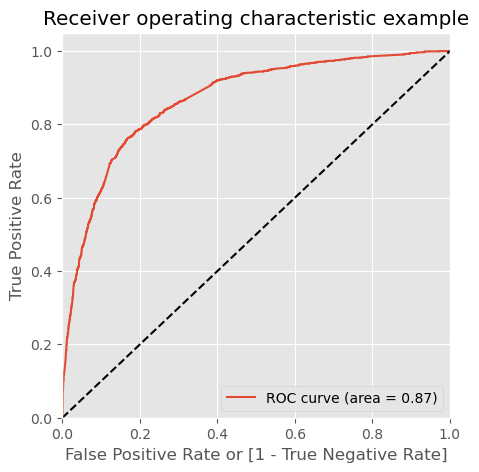

In [138]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


In [139]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,lead_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.235776,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.260147,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.333572,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.780042,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.235776,3934,0,1,1,1,0,0,0,0,0,0,0


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.585652  0.967964  0.350075
0.2   0.2  0.712585  0.924169  0.582209
0.3   0.3  0.779066  0.830495  0.747376
0.4   0.4  0.802721  0.764396  0.826337
0.5   0.5  0.807205  0.692214  0.878061
0.6   0.6  0.786797  0.569749  0.920540
0.7   0.7  0.766079  0.477291  0.944028
0.8   0.8  0.741187  0.375101  0.966767
0.9   0.9  0.690322  0.206407  0.988506


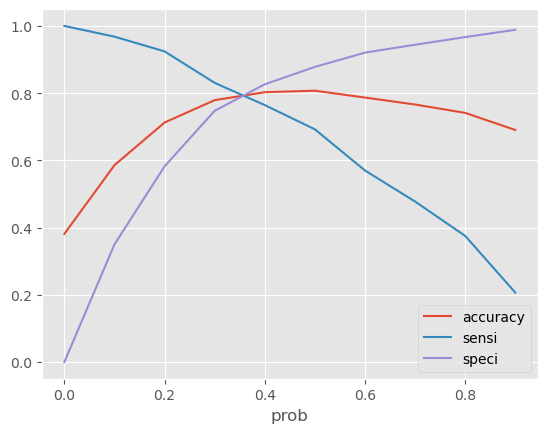

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above figure 0.36 is the optimum value to take

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()   #y_train_pred_final.Converted_Prob

,Converted,Converted_Prob,lead_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.235776,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.260147,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.333572,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.780042,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.235776,3934,0,1,1,1,0,0,0,0,0,0,0,0


Asssigning lead score to training data

In [143]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,lead_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.235776,1871,0,1,1,1,0,0,0,0,0,0,0,0,24
1,0,0.260147,6795,0,1,1,1,0,0,0,0,0,0,0,0,26
2,0,0.333572,3516,0,1,1,1,1,0,0,0,0,0,0,0,33
3,0,0.780042,8105,1,1,1,1,1,1,1,1,1,0,0,1,78
4,0,0.235776,3934,0,1,1,1,0,0,0,0,0,0,0,0,24


### Model Evaluation

In [144]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7926716141001855


In [145]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2


array([[3181,  821],
       [ 520, 1946]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7891321978913219


In [148]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7948525737131434


## Precision and Recall

In [149]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7776765375854214


In [150]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6922141119221411


In [151]:
from sklearn.metrics import precision_score, recall_score


In [152]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))


Precision : 0.7776765375854214


In [153]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6922141119221411


### Step 11: Making predictions on the test set

In [154]:
X_test[['total_visits','time_on_website','page_views_per_visit']] = scaler.transform(X_test[['total_visits','time_on_website','page_views_per_visit']])

In [155]:
X_test.shape

(2772, 28)

In [156]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,lead_source_Google,lead_source_Olark Chat,lead_source_Reference,lead_source_Welingak Website,occupation_Unemployed,last_activity_Email Opened,last_activity_Olark Chat Conversation,last_activity_Other_Activity,last_activity_SMS Sent
4269,0,1.742204,0.964504,1.717052,0,0,0,0,1,0,0,0,1
2376,0,-1.276203,-0.885371,-1.325438,0,0,1,0,1,0,0,0,1
7766,0,0.879802,-0.777416,1.717052,1,0,0,0,0,0,0,0,0
9199,0,-1.276203,-0.885371,-1.325438,0,1,0,0,1,0,1,0,0
4359,0,-1.276203,-0.885371,-1.325438,0,0,1,0,1,1,0,0,0


In [157]:
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result9.predict(X_test_sm)
y_test_pred[:10]

4269    0.698441
2376    0.935826
7766    0.137886
9199    0.057205
4359    0.814955
9186    0.556886
1631    0.411985
8963    0.206863
8007    0.094081
5324    0.330595
dtype: float64

In [158]:
y_test_pred[:10]

4269    0.698441
2376    0.935826
7766    0.137886
9199    0.057205
4359    0.814955
9186    0.556886
1631    0.411985
8963    0.206863
8007    0.094081
5324    0.330595
dtype: float64

In [159]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
# Let's see the head
y_pred_1.head()

,0
4269,0.698441
2376,0.935826
7766,0.137886
9199,0.057205
4359,0.814955


In [161]:
y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting Prospect ID to index
y_test_df['lead_number'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [165]:
y_pred_final.head()

,converted,lead_number,0
0,1,4269,0.698441
1,1,2376,0.935826
2,1,7766,0.137886
3,0,9199,0.057205
4,1,4359,0.814955


In [166]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [167]:
#y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
#y_train_pred_final['Prospect ID'] = y_train.index

In [168]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['lead_number','converted','Converted_Prob'])
#y_pred_final['Prospect ID'] = y_pred_final.index

In [169]:
# Let's see the head of y_pred_final
y_pred_final.head()

,lead_number,converted,Converted_Prob
0,4269,1,0.698441
1,2376,1,0.935826
2,7766,1,0.137886
3,9199,0,0.057205
4,4359,1,0.814955


In [170]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [171]:
y_pred_final.head()

,lead_number,converted,Converted_Prob,final_predicted
0,4269,1,0.698441,1
1,2376,1,0.935826,1
2,7766,1,0.137886,0
3,9199,0,0.057205,0
4,4359,1,0.814955,1


In [172]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted))

Accuracy : 0.799062049062049


In [173]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
confusion2

array([[1360,  317],
       [ 240,  855]], dtype=int64)

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7808219178082192


In [176]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8109719737626714


#### Assigning Lead Score to the Testing data¶


In [177]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,lead_number,converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.698441,1,70
1,2376,1,0.935826,1,94
2,7766,1,0.137886,0,14
3,9199,0,0.057205,0,6
4,4359,1,0.814955,1,81


### Observations:¶
After running the model on the Test Data , we obtain:

Accuracy : 79.76 %

Sensitivity : 78.26 %

Specificity : 80.74 %

## Results :
1) Comparing the values obtained for Train & Test:

#### Train Data:
Accuracy : 79 %

Sensitivity : 79 %

Specificity : 78 %

#### Test Data:
Accuracy : 79.76 %

Sensitivity : 78.26 %

Specificity : 80.74 %

In [178]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,lead_number,converted,Converted_Prob,final_predicted,Lead_Score
1,2376,1,0.935826,1,94
12,2935,1,0.894732,1,89
13,2907,1,0.935480,1,94
25,1557,1,0.860486,1,86
33,8429,1,0.989130,1,99
...,...,...,...,...,...
2710,5418,1,0.966783,1,97
2733,5362,1,0.873333,1,87
2734,5741,1,0.925534,1,93
2740,6944,1,0.988040,1,99


So there are 310 leads which can be contacted and have a high chance of getting converted. The lead_number of the customers to be contacted are :



In [179]:
print("The lead_number of the customers which should be contacted are :")

hot_leads_ids = hot_leads["lead_number"].values.reshape(-1)
hot_leads_ids


The lead_number of the customers which should be contacted are :


array([2376, 2935, 2907, 1557, 8429, 1200, 5638, 6666, 5448, 1287, 8103,
       3444, 2392, 5363, 8499, 4830, 1365, 6687, 5793, 8099, 4868, 8120,
       2844, 7396,   88, 7683, 6860, 4058, 6020, 5896,  269, 2115, 8113,
       5911, 4645, 2481, 3518, 1965, 2946,  954, 4902, 5818, 2804,  446,
       3725, 4786, 1026, 5825, 8055, 2266, 4403, 2926, 2524, 1467, 5697,
       6725, 6156, 2055, 2549, 2653, 3478, 5687, 4445, 3655, 5832, 3190,
         77, 9026, 6243, 4038, 7187, 1875, 5812, 7033, 3188, 8556, 3500,
       7818, 1675, 3321, 7053, 4212, 1350, 7877, 6375, 7222, 5586, 7482,
       6383, 1425, 3172, 2158, 3919, 5784, 3455, 5942, 6046, 4612, 9087,
       3456, 2688, 2914, 5263, 7095, 4613, 2525, 1928, 8098, 2662, 4281,
       2337, 7636,  507, 8412, 3339, 8054, 8082, 3113, 7756, 8087, 3488,
       6877, 8888, 2764, 6760, 2124, 7963, 5671, 4213, 4803, 5571, 8641,
        918, 2258, 8451,  818, 7453, 6987, 8495, 3242, 3737, 1283, 6778,
        220, 2122,  819, 4488, 8042, 6305, 6158, 49

In [180]:
result9.params.sort_values(ascending=False)

lead_source_Welingak Website             5.687717
lead_source_Reference                    3.856700
last_activity_Other_Activity             1.993010
last_activity_SMS Sent                   1.919141
lead_source_Olark Chat                   1.198189
time_on_website                          1.068797
last_activity_Email Opened               0.721840
total_visits                             0.397040
lead_source_Google                       0.340152
page_views_per_visit                    -0.380879
last_activity_Olark Chat Conversation   -0.904391
const                                   -1.037540
occupation_Unemployed                   -1.110314
do_not_email                            -1.231566
dtype: float64

### Recommendations:
The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.

The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.

The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.

The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

The company should make calls to the leads whose last_activity_Other_Activity as they are more likely to get converted.

The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

The company should not make calls to the leads whose occupation_Unemployed as they are not likely to get converted.

The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.
